# Tensorflow Speech Recognition Challenge

Kaggle challenge: https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

## Set up 

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGes5aQQ1bl8Y9azaWvduI62XeaJRJ40kuyYifdJLqFQhUQ7Z6CEKs
Mounted at /content/drive


In [2]:
import os
PATH = '/content/drive/My Drive'
os.chdir(PATH)

### Upgrade Kaggle package and download dataset

In [3]:
!pip install kaggle --upgrade

     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=90313f3369beeb2be523e26e6901b46d451487327d3a0dab93ef9201e28547fb
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
  Created wheel for slugify: filename=slugify-0.0.1-cp36-none-any.whl size=1910 sha256=d90ccb23502c12bd18dedb026541a87035f06694425327e5a848109e35518143
  Stored in directory: /root/.cache/pip/wheels/f9/68/7b/b797d07992b6c7ef1666a59cc79f45fb37aab4344efa6cc3e1
Successfully built kaggle slugify
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [7]:
# ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
PATH = '/content/drive/My Drive/tf-speech-recognition'
# os.makedirs(PATH, exist_ok=True)
os.chdir(PATH)

In [10]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

100% 3.49G/3.50G [01:00<00:00, 62.9MB/s]
100% 3.50G/3.50G [01:00<00:00, 62.6MB/s]


### Unzip files

In [12]:
!ls

tensorflow-speech-recognition-challenge.zip


In [13]:
import zipfile
with zipfile.ZipFile('tensorflow-speech-recognition-challenge.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
!ls

link_to_gcp_credits_form.txt		     test.7z
sample_submission.7z			     train.7z
tensorflow-speech-recognition-challenge.zip  Unpack_gjcto3tc


In [10]:
!pip install patool

     |████████████████████████████████| 81kB 2.2MB/s 


In [12]:
import patoolib
patoolib.extract_archive('train.7z')

patool: Extracting train.7z ...
patool: running /usr/bin/7z x -o./Unpack_vc_2daf5 -- train.7z
patool: ... train.7z extracted to `train'.


'train'

### Import libraries

In [4]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

## Data visualization

In [5]:
train_audio_path = 'train/audio/'

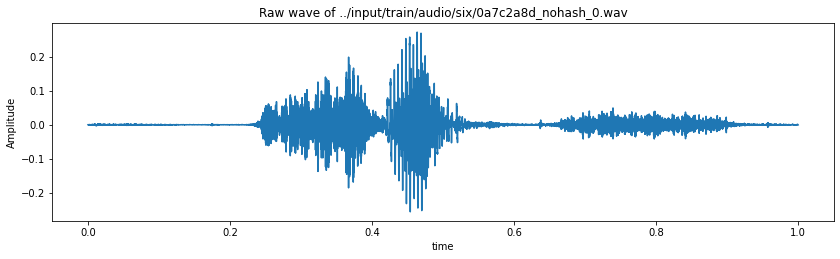

In [10]:
samples, sample_rate = librosa.load(train_audio_path+'six/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/six/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [11]:
# sampling rate
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [12]:
# resampling
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [8]:
labels=os.listdir(train_audio_path)

In [9]:
# remove empty folders
for label in labels:
  if len(os.listdir(train_audio_path + '/'+ label)) == 0:
    os.rmdir(train_audio_path + '/'+ label)

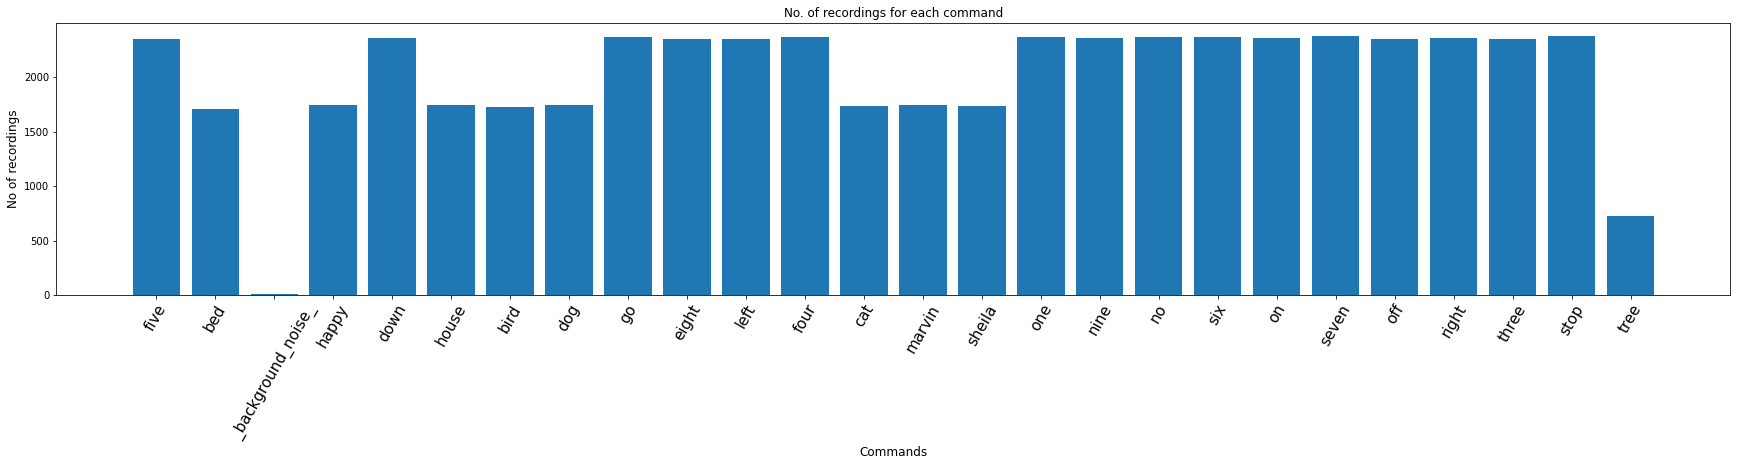

In [17]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

## Data preprocessing

The data preprocessing takes quite a substantial time. Thus, I narrowed down to 5 classes in this analysis.

In [6]:
labels = ['bed', '_background_noise_', 'bird', 'happy' , 'dog']

In [9]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(os.path.join(train_audio_path,label)) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(os.path.join(train_audio_path,label,wav), sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

bed
_background_noise_
bird
happy
dog


In [10]:
import pickle
with open('train/all_wave.pkl', 'wb') as f:
  pickle.dump(all_wave, f)
with open('train/all_label.pkl', 'wb') as f:
  pickle.dump(all_label, f)

In [8]:
all_wave = pickle.load(open('train/all_wave.pkl', 'rb'))
all_label = pickle.load(open('train/all_label.pkl', 'rb'))

In [28]:
print(len(all_wave))

6101


### Convert labels to integer encoded

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=len(labels))

In [13]:
# reshape from 2D to 3D array
all_wave = np.array(all_wave).reshape(-1,8000,1)

### Split into training and validation set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

## Train model

In [21]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

inputs = Input(shape=(8000,1))

#First Conv1D layer
x = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)

#Second Conv1D layer
x = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)

#Third Conv1D layer
x = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)

#Fourth Conv1D layer
x = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)

#Flatten layer
x = Flatten()(x)

#Dense Layer 1
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

#Dense Layer 2
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(len(labels), activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 884, 16)          

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [23]:
history = model.fit(X_train, y_train ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(X_val,y_val))

Epoch 1/100
152/153 [============================>.] - ETA: 0s - loss: 1.4091 - accuracy: 0.2708
Epoch 00001: val_accuracy improved from -inf to 0.39558, saving model to best_model.hdf5
153/153 [==============================] - 2s 12ms/step - loss: 1.4087 - accuracy: 0.2707 - val_loss: 1.2926 - val_accuracy: 0.3956
Epoch 2/100
145/153 [===========================>..] - ETA: 0s - loss: 1.1514 - accuracy: 0.4916
Epoch 00002: val_accuracy improved from 0.39558 to 0.60278, saving model to best_model.hdf5
153/153 [==============================] - 1s 8ms/step - loss: 1.1513 - accuracy: 0.4916 - val_loss: 1.0101 - val_accuracy: 0.6028
Epoch 3/100
152/153 [============================>.] - ETA: 0s - loss: 0.8687 - accuracy: 0.6419
Epoch 00003: val_accuracy improved from 0.60278 to 0.68059, saving model to best_model.hdf5
153/153 [==============================] - 1s 8ms/step - loss: 0.8689 - accuracy: 0.6414 - val_loss: 0.7558 - val_accuracy: 0.6806
Epoch 4/100
149/153 [=====================

### Visualize loss

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

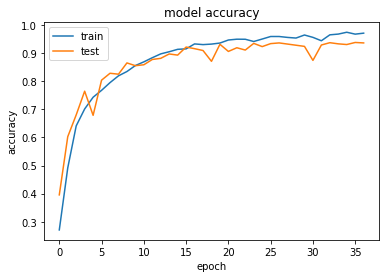

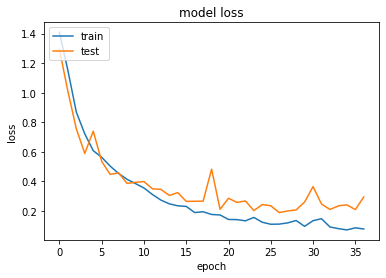

In [27]:
plot_loss(history)